In [108]:
import pandas as pd
import numpy as np
from datetime import datetime
import os,sys
import sqlite3
import csv
from IPython.display import display
from sqlalchemy import create_engine # database connection
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [ ]:
#df311 = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [2]:
disk_engine = create_engine('sqlite:///311.db')

In [12]:
headers

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',


In [15]:
display(pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', nrows=2).head())

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,25138256,03/07/2013 12:44:28 PM,03/22/2013 12:00:00 AM,DOB,Department of Buildings,Special Enforcement,SEP - Professional Certification Compliance Audit,NaN,10014,41 PERRY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.735621,-74.002818,"(40.73562056845719, -74.00281814476)"
1,25138257,03/07/2013 06:50:51 PM,06/05/2013 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11216,1154 BEDFORD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.684822,-73.954212,"(40.68482240614833, -73.95421208790158)"


In [18]:
!wc -l < 311_Service_Requests_from_2010_to_Present.csv

 13844714


In [43]:

start = dt.datetime.now()
chunksize = 20000
j = 0
index_start = 1

for df in pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    df['CreatedDate'] = pd.to_datetime(df['CreatedDate']) # Convert to datetimes
    df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

    df.index += index_start

    # Remove the un-interesting columns
    columns = ['Agency', 'CreatedDate', 'ClosedDate', 'Agency', 'AgencyName','ComplaintType', 'Descriptor',
               'IncidentZip', 'IncidentAddress', 'LocationType', 
               'Borough', 'Latitude','Longitude', 'Location']

    for c in df.columns:
        if c not in columns:
            df = df.drop(c, axis=1)    

    
    j+=1
    print '{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize)

    df.to_sql('data', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1

13 seconds: completed 20000 rows
28 seconds: completed 40000 rows
43 seconds: completed 60000 rows
57 seconds: completed 80000 rows
72 seconds: completed 100000 rows
86 seconds: completed 120000 rows
100 seconds: completed 140000 rows
115 seconds: completed 160000 rows
130 seconds: completed 180000 rows
147 seconds: completed 200000 rows
161 seconds: completed 220000 rows
176 seconds: completed 240000 rows
190 seconds: completed 260000 rows
206 seconds: completed 280000 rows
221 seconds: completed 300000 rows
236 seconds: completed 320000 rows
251 seconds: completed 340000 rows
265 seconds: completed 360000 rows
279 seconds: completed 380000 rows
294 seconds: completed 400000 rows
308 seconds: completed 420000 rows
323 seconds: completed 440000 rows
338 seconds: completed 460000 rows
353 seconds: completed 480000 rows
368 seconds: completed 500000 rows
383 seconds: completed 520000 rows
398 seconds: completed 540000 rows
413 seconds: completed 560000 rows
427 seconds: completed 580000 

In [79]:
df = pd.read_sql_query("SELECT * FROM data WHERE LocationType IN ('RESIDENTIAL BUILDING','Residence','Residential','Residential Building','Residential Building/House','Residential Property')" , disk_engine)

In [16]:
df = pd.read_sql_query("SELECT * FROM data WHERE Borough IS NOT 'STATEN ISLAND' AND LocationType IN ('RESIDENTIAL BUILDING','Residence','Residential','Residential Building','Residential Building/House','Residential Property')", disk_engine)

In [26]:
df=df.dropna()

In [29]:
df = df.drop('index', axis= 1)

df = df.reset_index(drop=True)

In [30]:
df

,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,Borough,Latitude,Longitude,Location
0,2013-03-07 00:00:00.000000,2013-03-12 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,SMOKE-DETECTOR,RESIDENTIAL BUILDING,10457.0,709 FAIRMOUNT PLACE,BRONX,40.844173,-73.891670,"(40.84417324510356, -73.89166951222118)"
1,2013-03-07 00:00:00.000000,2013-03-22 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,11212.0,181 ROCKAWAY PARKWAY,BROOKLYN,40.662317,-73.921442,"(40.66231674694474, -73.92144177201318)"
2,2013-03-07 00:00:00.000000,2013-03-14 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10460.0,1900 BOSTON ROAD,BRONX,40.839750,-73.881283,"(40.83974952830132, -73.88128276289163)"
3,2013-03-07 00:00:00.000000,2013-03-19 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10027.0,6 ST NICHOLAS TERRACE,MANHATTAN,40.812587,-73.952014,"(40.812586786931575, -73.95201445810778)"
4,2013-03-07 00:00:00.000000,2013-03-10 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,11226.0,101 WOODRUFF AVENUE,BROOKLYN,40.653708,-73.962710,"(40.65370793721925, -73.96270993293973)"
5,2013-03-07 00:00:00.000000,2013-03-22 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10040.0,519 WEST 189 STREET,MANHATTAN,40.853427,-73.927961,"(40.85342657498437, -73.92796122060126)"
6,2013-03-07 00:00:00.000000,2013-03-12 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10026.0,364 WEST 116 STREET,MANHATTAN,40.805225,-73.957308,"(40.80522477580805, -73.95730795865276)"
7,2013-03-07 00:00:00.000000,2013-03-22 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,11212.0,123 EAST 96 STREET,BROOKLYN,40.663122,-73.923708,"(40.66312249282338, -73.92370802817858)"
8,2013-03-07 00:00:00.000000,2013-03-26 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10031.0,450 WEST 149 STREET,MANHATTAN,40.827367,-73.944795,"(40.82736661068927, -73.94479515442661)"
9,2013-03-07 00:00:00.000000,2013-03-22 00:00:00.000000,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,11212.0,123 EAST 96 STREET,BROOKLYN,40.663122,-73.923708,"(40.66312249282338, -73.92370802817858)"


In [74]:
Locations = ['RESIDENTIAL BUILDING', '1-2 Family Dwelling', '1-, 2- and 3- Family Home',
            'Residential Building/House', '3+ Family Apartment Building','3+ Family Apt. Building','Single Room Occupancy (SRO)',
            'NYC Street Address', 'Residential', 'Co-Op Unit', 'Condo Unit', 'Street/Curbside', '3+ Family Mixed Use Building',
            'Tenant Address', 'Residential Building', 'Curb', 'Street and Sidewalk', '1-2 Family Mixed Use Building','Residence',
            'Building','1-3 Family Dwelling','Utility','1-3 Family Mixed Use Building','House and Store', 'Apartment Building',
            'Home','Caller Address','Apartment', 'Private House','Residential Property',"DRIE Tenant's Address",'Hallway']

In [64]:
InfraComplaint = ['Dirty Conditions', 'Sanitation Condition', 'Indoor Air Quality', 'Noise - Residential',
                 'PAINT - PLASTER', 'PLUMBING', 'APPLIANCE', 'ELECTRIC', 'Maintenance or Facility', 'Rodent',
                 'HEATING', 'Boilers', 'Smoking', 'Unsanitary Animal Pvt Property', 'Building/Use', 'Electrical',
                 'Elevator', 'General Construction/Plumbing', 'Housing - Low Income Senior', 'Plumbing',
                 'Asbestos', 'Unsanitary Animal Facility', 'Indoor Sewage', 'Air Quality', 'Water System', 'Mold',
                 'Window Guard', 'Scaffold Safety', 'Snow', 'Building Condition', 'Sewer', 'Water Quality', 'Drinking Water',
                 'Fire Alarm - Replacement', 'Fire Alarm - Modification', 'PAINT/PLASTER', 'STRUCTURAL', 'Lead', 'Overflowing Recycling Baskets', 'UNSANITARY CONDITION',
                 'WATER LEAK', 'GENERAL', 'DOOR/WINDOW', 'FLOORING/STAIRS', 'HEAT/HOT WATER', 'ELEVATOR','Asbestos/Garbage Nuisance',
                 'Weatherization', 'Home Repair', 'LEAD', 'Eviction', 'NONCONST', 'SAFETY']

In [20]:
df2 = pd.read_sql_query("SELECT * FROM data WHERE Borough IS NOT 'STATEN ISLAND' AND LocationType IN ('1-, 2- and 3- Family Home','1-2 Family Dwelling','1-2 Family Mixed Use Building','1-3 Family Dwelling','1-3 Family Mixed Use Building','3+ Family Apartment Building','3+ Family Apt. Building','3+ Family Mixed Use Building','Apartment','Apartment Building','Building','Co-Op Unit','Condo Unit','Home','House and Store','NYC Street Address','Private House','Tenant Address')", disk_engine)

In [23]:
df2 = df2.dropna()

In [31]:
df2 = df2.drop('index', axis= 1)

df2 = df2.reset_index(drop=True)

In [33]:
dflist = pd.concat([df, df2], axis = 0, ignore_index= True)

In [37]:
dflist.to_sql('data_noSI', disk_engine, if_exists='append')

In [41]:
df3 = pd.read_sql_query("SELECT * FROM data_noSI WHERE ComplaintType NOT IN ('Noise - Residential', 'Graffiti', 'Animal Abuse', 'Noise Survey', 'Smoking', 'Drinking','Benefit Card Replacement', 'VACANT APARTMENT', 'AGENCY', 'Illegal Animal Sold', 'Food Establishment','Posting Advertisement', 'Illegal Animal Kept as Pet', 'Disorderly Youth')", disk_engine)

In [44]:
df3.to_sql('InfraData', disk_engine, if_exists='append')
df3['CreatedDate'] = pd.to_datetime(df3['CreatedDate'])

df3['ClosedDate'] = pd.to_datetime(df3['ClosedDate'])

In [54]:
df3 = df3.drop('index', axis = 1)

In [56]:
df3['FullAdd'] =  df3['IncidentAddress'] + ', ' + df3['Borough']

In [86]:
df3[df3['IncidentAddress'] == '1 ADRIAN AVENUE']

,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,Borough,Latitude,Longitude,Location,FullAdd,geoID
24420,2013-03-22 00:00:00,2013-03-25 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,BRONX,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, BRONX",36061030900
33574,2013-03-29 00:00:00,2013-04-03 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,MANHATTAN,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, MANHATTAN",36061030900
34104,2013-03-29 00:00:00,2013-04-03 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,MANHATTAN,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, MANHATTAN",36061030900
40319,2013-04-04 00:00:00,2013-04-10 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,TOILET,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,MANHATTAN,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, MANHATTAN",36061030900
40782,2013-04-04 00:00:00,2013-04-10 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,LOCKS,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,MANHATTAN,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, MANHATTAN",36061030900
40917,2013-04-04 00:00:00,2013-04-10 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,MANHATTAN,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, MANHATTAN",36061030900
41291,2013-04-04 00:00:00,2013-04-10 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,MANHATTAN,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, MANHATTAN",36061030900
41366,2013-04-04 00:00:00,2013-04-10 00:00:00,HPD,Department of Housing Preservation and Develop...,ELECTRIC,ELECTRIC-SUPPLY,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,MANHATTAN,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, MANHATTAN",36061030900
54631,2013-04-15 00:00:00,2013-04-18 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,MANHATTAN,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, MANHATTAN",36061030900
55419,2013-04-15 00:00:00,2013-04-18 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10463.0,1 ADRIAN AVENUE,MANHATTAN,40.875898,-73.912468,"(40.8758976843239, -73.91246765124495)","1 ADRIAN AVENUE, MANHATTAN",36061030900


In [70]:
X = pd.concat([censusdict['INTPTLAT'], censusdict['INTPTLONG']], axis = 1)

y = censusdict['GEOID']

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 1)

model.fit(X, y)

Xflist = pd.concat([df3['Latitude'], df3['Longitude']], axis = 1)

yflist = model.predict(Xflist)

df3['geoID'] = yflist

In [61]:
censusdict = pd.read_csv('2010_gaz_tracts.txt', delimiter= '\t')

In [64]:
moo = list(censusdict.columns)

In [67]:
moo.append('INTPTLONG')

In [68]:
censusdict.columns = moo

In [80]:
overall_complaints = pd.DataFrame(df3.groupby('geoID', as_index=False ).size())

In [82]:
overall_complaints = overall_complaints.reset_index()

In [84]:
overall_complaints.columns = ['geoID', 'Total']

In [133]:
overall_complaints.to_pickle('overall_complaints.p')

In [101]:
weather = pd.read_csv('central_park_weather.csv')

In [105]:

weather['DATE'] = pd.to_datetime(weather['DATE'], format='%Y%m%d')

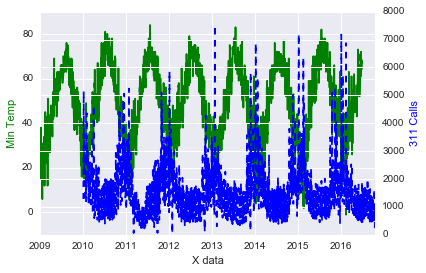

In [165]:
#plt.plot(weather['DATE'], weather['TMIN'])
#plt.plot(dateline['DATE'], dateline['EVENTS'])

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(weather['DATE'], weather['TMIN'], 'g-')
ax2.plot(dateline['DATE'], dateline['EVENTS'], 'b--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Min Temp', color='g')
ax2.set_ylabel('311 Calls', color='b')

plt.show()

In [131]:
df3['ClosedDate'] = df3['ClosedDate'].dt.date

In [127]:
weather['DATE'][0].date()

datetime.date(2009, 1, 1)

In [143]:
dateline = pd.DataFrame(df3.groupby('CreatedDate', as_index = False).size())

In [144]:
dateline = dateline.reset_index()

In [148]:
dateline.columns = ['DATE', 'EVENTS']

In [182]:
colddays = pd.DataFrame(weather[weather['TMIN'] <=40]['DATE'])
colddays['DATE'] = colddays['DATE'].dt.date

In [184]:
cold311 = pd.merge(df3, colddays, how = 'inner', left_on = 'CreatedDate', right_on = 'DATE')

In [188]:
cold_complaints = pd.DataFrame(cold311.groupby('geoID', as_index=False ).size())

In [190]:
cold_complaints = cold_complaints.reset_index()

In [192]:
len(cold_complaints)

2137

In [193]:
len(overall_complaints)

2154

In [244]:
moo = pd.merge(moo, blah, how = 'left', on = 'geoID')

In [245]:
moo.columns = ['geoID', 'Total', 'ColdTotal', 'ColdDaily', 'TotalDaily', 'NormalTotal', 'NormalDaily']

In [246]:
moo.to_pickle('weather311_summary.p')

In [212]:
blah = df3.groupby(['geoID', 'CreatedDate'], as_index=False ).size()

blah = blah.reset_index()

blah = blah.groupby('geoID').mean()

In [248]:
weather_summary = moo

In [224]:
combo = pd.merge(df3, colddays, how = 'left', left_on = 'CreatedDate', right_on = 'DATE')

In [230]:
normal311 = combo[pd.isnull(combo['DATE'])]

In [231]:
normal311

,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,Borough,Latitude,Longitude,Location,FullAdd,geoID,DATE
4090,2013-03-12,2013-03-25,HPD,Department of Housing Preservation and Develop...,ELECTRIC,ELECTRIC-SUPPLY,RESIDENTIAL BUILDING,11374.0,98-10 64 AVENUE,QUEENS,40.730428,-73.858010,"(40.73042781783843, -73.85801042624362)","98-10 64 AVENUE, QUEENS",36081071701,NaN
4398,2013-03-12,2013-03-12,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10457.0,671 EAST 179 STREET,BRONX,40.847098,-73.890559,"(40.84709805565759, -73.89055873344108)","671 EAST 179 STREET, BRONX",36005037300,NaN
4418,2013-03-12,2013-03-12,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10040.0,34 ARDEN STREET,MANHATTAN,40.861937,-73.927146,"(40.86193738190631, -73.92714580413967)","34 ARDEN STREET, MANHATTAN",36061028500,NaN
5804,2013-03-12,2013-03-15,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,11355.0,143-30 SANFORD AVENUE,QUEENS,40.758432,-73.822248,"(40.758432312270216, -73.82224796017576)","143-30 SANFORD AVENUE, QUEENS",36081085700,NaN
5805,2013-03-12,2013-03-15,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10463.0,3410 KINGSBRIDGE AVENUE,BRONX,40.882648,-73.903787,"(40.882648203870616, -73.9037867278487)","3410 KINGSBRIDGE AVENUE, BRONX",36005028700,NaN
5806,2013-03-12,2013-03-16,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10458.0,3224 GRAND CONCOURSE,BRONX,40.877408,-73.885269,"(40.87740813337486, -73.88526914592198)","3224 GRAND CONCOURSE, BRONX",36005041100,NaN
5807,2013-03-12,2013-03-18,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10457.0,1510 SHERIDAN AVENUE,BRONX,40.841006,-73.911299,"(40.841006147648265, -73.91129922391039)","1510 SHERIDAN AVENUE, BRONX",36005022500,NaN
5808,2013-03-12,2013-03-19,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10027.0,162 WEST 132 STREET,MANHATTAN,40.812882,-73.943915,"(40.812882306045815, -73.94391486415442)","162 WEST 132 STREET, MANHATTAN",36061022600,NaN
5809,2013-03-12,2013-03-25,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,11691.0,833 CENTRAL AVENUE,QUEENS,40.609907,-73.745025,"(40.60990706779692, -73.74502543312549)","833 CENTRAL AVENUE, QUEENS",36081103202,NaN
5810,2013-03-12,2013-03-18,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,11372.0,94-24 NORTHERN BOULEVARD,QUEENS,40.756804,-73.873555,"(40.75680379904798, -73.87355459831507)","94-24 NORTHERN BOULEVARD, QUEENS",36081035300,NaN


In [234]:
normal_complaints = pd.DataFrame(normal311.groupby('geoID', as_index=False ).size())

In [235]:
normal_complaints = normal_complaints.reset_index()

In [241]:
blah = normal311.groupby(['geoID', 'CreatedDate'], as_index=False ).size()

blah = blah.reset_index()

blah = blah.groupby('geoID').mean()

In [243]:
blah = blah.reset_index()

In [287]:
weather_summary.ix[weather_summary.NormalDaily==0, 'Ratio'] = 2

In [269]:
weather_summary.to_pickle('weather311_summary.p')

In [271]:
r = weather_summary['ColdDaily']/weather_summary['NormalDaily']

In [274]:
len(r[r>1])

724

In [275]:
len(r[r<=1])

1430

In [279]:
weather_summary['Ratio'] = r

In [314]:
weather_summary.to_pickle('weather311_summary.p')

In [293]:
weather_summary

,geoID,Total,ColdTotal,ColdDaily,TotalDaily,NormalTotal,NormalDaily,Ratio
0,36005000100,4,4.0,1.000000,1.000000,0.0,0.000000,2.000000
1,36005000200,413,217.0,2.237113,2.024510,196.0,1.831776,1.221281
2,36005000400,1064,478.0,2.426396,2.707379,586.0,2.989796,0.811559
3,36005001600,2401,1233.0,2.740000,2.719139,1168.0,2.697460,1.015771
4,36005001900,49,32.0,2.285714,2.041667,17.0,1.700000,1.344538
5,36005002000,2445,1313.0,2.741127,2.967233,1132.0,3.281159,0.835414
6,36005002300,3367,1717.0,3.700431,3.521967,1650.0,3.353659,1.103401
7,36005002400,6,4.0,2.000000,1.500000,2.0,1.000000,2.000000
8,36005002500,7448,3325.0,5.219780,5.111874,4123.0,5.028049,1.038132
9,36005002701,2245,1013.0,2.798343,3.075342,1232.0,3.347826,0.835869


In [309]:
more = df3[df3['geoID'] == 36005027900]

In [310]:
more = more.groupby('CreatedDate').size()

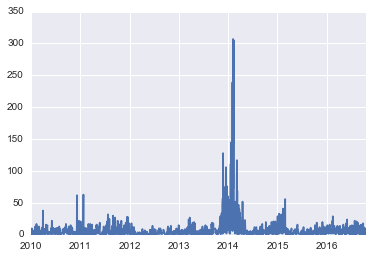

In [312]:
plt.plot(more['CreatedDate'], more[0])

In [311]:
more = more.reset_index()

In [313]:
weather_summary.sort()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,geoID,Total,ColdTotal,ColdDaily,TotalDaily,NormalTotal,NormalDaily,Ratio
0,36005000100,4,4.0,1.000000,1.000000,0.0,0.000000,2.000000
1,36005000200,413,217.0,2.237113,2.024510,196.0,1.831776,1.221281
2,36005000400,1064,478.0,2.426396,2.707379,586.0,2.989796,0.811559
3,36005001600,2401,1233.0,2.740000,2.719139,1168.0,2.697460,1.015771
4,36005001900,49,32.0,2.285714,2.041667,17.0,1.700000,1.344538
5,36005002000,2445,1313.0,2.741127,2.967233,1132.0,3.281159,0.835414
6,36005002300,3367,1717.0,3.700431,3.521967,1650.0,3.353659,1.103401
7,36005002400,6,4.0,2.000000,1.500000,2.0,1.000000,2.000000
8,36005002500,7448,3325.0,5.219780,5.111874,4123.0,5.028049,1.038132
9,36005002701,2245,1013.0,2.798343,3.075342,1232.0,3.347826,0.835869


In [315]:
censusdata = pd.read_csv('demographics_CT_NYC_residents.csv')

In [335]:
censusinfo = pd.concat([censusdata['Geo_FIPS'], censusdata['Total Population']], axis = 1)

In [338]:
info = ['income per capita', 'Median Age', 'family households', 'nonfamily households', 'total housing units', 
       'owner  occupied units', 'renter occupied units', 'median rent']
for i in info:
    censusinfo = pd.concat([censusinfo, censusdata[i]], axis = 1)

In [352]:
censussum = censussum.drop(['family households', 'nonfamily households', 'owner  occupied units', 'renter occupied units'], axis = 1)
censussum.head()

,Geo_FIPS,Total Population,income per capita,Median Age,total housing units,median rent,OwnerRenter,NonFamFam
0,36005000100,8430,3327.0,29.3,0,NaN,NaN,NaN
1,36005000200,5095,22971.0,36.6,1475,1282.0,1.389948,0.182676
2,36005000400,5572,29803.0,36.5,1995,1491.0,2.733333,0.244186
3,36005001600,5412,18544.0,39.9,2038,920.0,0.245258,0.452888
4,36005001900,2569,16168.0,30.6,895,1126.0,0.081152,0.782051


In [348]:
OwnerR = censusinfo['owner  occupied units']/censusinfo['total housing units']
RenterR = censusinfo['renter occupied units']/censusinfo['total housing units']
censusinfo['OwnerRenter'] = OwnerR/RenterR
censussum = censusinfo.copy()

In [350]:
censussum['NonFamFam'] = censusinfo['nonfamily households']/censusinfo['family households']

In [327]:
ctpop['boroCode'].value_counts()

47    761
81    669
5     338
61    288
85    111
Name: boroCode, dtype: int64

In [332]:
ctpop = ctpop.drop(['Unnamed: 5', 'Unnamed: 6'], axis = 1)

In [334]:
ctpop.to_pickle('CTpop.p')

In [354]:
moo = pd.merge(censussum, ctpop, how = 'inner', left_on='Geo_FIPS', right_on = 'geoID')

In [360]:
moo = moo.drop('Geo_FIPS', axis = 1)

In [364]:
ctsum = moo.dropna()

In [365]:
ctsum = ctsum.reset_index(drop= True)

In [367]:
ctsum.to_pickle('census_final_sum.p')

In [368]:
master = pd.read_csv('masterlist.csv')

In [370]:
master = master.drop('Unnamed: 0', axis = 1)
master

,geoID,YearBuilt,Lat,Long,RC,TotalB,WCount,Wratio
0,36005000200,1955.571429,40.803534,-73.860661,0.000000,17,0.0,0.000000
1,36005000400,1952.666667,40.808787,-73.851425,0.000000,22,1.0,0.045455
2,36005001600,1953.473684,40.818848,-73.858076,0.000000,20,1.0,0.050000
3,36005001900,1922.000000,40.800999,-73.909373,0.000000,6,0.0,0.000000
4,36005002000,1963.500000,40.817580,-73.866096,0.000000,4,3.0,0.750000
5,36005002300,1915.395349,40.809082,-73.925844,0.222222,45,8.0,0.177778
6,36005002500,1919.400000,40.807003,-73.920875,0.240000,25,3.0,0.120000
7,36005002701,1932.545455,40.805061,-73.916333,0.250000,12,2.0,0.166667
8,36005002702,1920.000000,40.806449,-73.913773,0.500000,2,1.0,0.500000
9,36005002800,1958.750000,40.822518,-73.878234,0.000000,8,0.0,0.000000


In [376]:
mo = pd.merge(moo, weather_summary, how= 'left' on='geoID')

In [373]:
moo.to_pickle('masterlist.p')

In [385]:
len(set(master['geoID'])-set(ctsum['geoID']))

39

In [435]:
X.ix[X.PercentPopChange== '-', 'PercentPopChange']

,YearBuilt,RC,TotalB,Total Population,income per capita,Median Age,total housing units,median rent,OwnerRenter,NonFamFam,AvgHouse,AvgFam,PercentPopChange,Total,TotalDaily,Ratio


In [417]:
mo[mo['geoID'] == 36005000200]

,geoID,YearBuilt,Lat,Long,RC,TotalB,WCount,Wratio,Total Population,income per capita,...,AvgHouse,AvgFam,PercentPopChange,Total,ColdTotal,ColdDaily,TotalDaily,NormalTotal,NormalDaily,Ratio
0,36005000200,1955.571429,40.803534,-73.860661,0.0,17,0.0,0.0,5095,22971.0,...,3.2,3.56,22.3,413,217.0,2.237113,2.02451,196.0,1.831776,1.221281


In [511]:
X = mo.drop(['geoID', 'Lat', 'Long', 'WCount', 'Wratio', 'ColdTotal', 'NormalTotal', 'NormalDaily'], axis = 1)

In [512]:
mo.loc[1170]['NonFamFam']

20.0

In [484]:
mo.NonFamFam.max()

24.725000000000001